In [ ]:
"""
Mini Project 1- Stock Prediction using Python :
Stock market prediction is a process of using various techniques and tools to forecast the future value of a particular stock or a set of stocks.
The goal is to identify trends, patterns, and signals in a historical stock data and use the information to make informed predictions about fture stock prices.

Here we will use python libraries such as yfinance, pandas, matplotlib, seaborn to collect , analyze and visualize the data.

"""

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
msft = yf.Ticker("MSFT")

In [ ]:
hist = msft.history(period='max')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060657,0.063907,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062823,0.064448,0.062823,0.063907,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-21 00:00:00-04:00,285.010010,286.269989,283.059998,285.760010,21665400,0.0,0.0
2023-04-24 00:00:00-04:00,282.089996,284.950012,278.720001,281.769989,26611000,0.0,0.0
2023-04-25 00:00:00-04:00,279.510010,281.600006,275.369995,275.420013,45772200,0.0,0.0


In [ ]:
from datetime import datetime
end = datetime.now()

end

datetime.datetime(2023, 4, 28, 11, 24, 56, 138435)

In [ ]:
#setting a variable for all the four tickers
tick1='AMZN'
tick2='AAPL'
tick3='GOOG'
tick4='MSFT'

In [ ]:
#setting the time interval of stocks to download to analyze
start = datetime(end.year-4,11,end.day-3)
end_d = datetime(end.year,11,end.day-3)


In [ ]:
#downloaded the historic stock data for all the four brands
AMZN=yf.download(tick1,start,end_d)
AAPL=yf.download(tick2,start,end_d)
GOOG=yf.download(tick3,start,end_d)
MSFT=yf.download(tick4,start,end_d)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# we will first analyze amazon stocks and move further with other stocks
AMZN.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-25,87.662498,88.871002,87.662003,88.692001,88.692001,69724000
2019-11-26,88.996002,89.851501,88.917503,89.847000,89.847000,63624000
2019-11-27,90.050003,91.224998,89.865501,90.925499,90.925499,60512000
2019-11-29,90.889000,91.234497,90.039497,90.040001,90.040001,38468000
2019-12-02,90.220001,90.277496,88.134003,89.080002,89.080002,78512000
2019-12-03,88.000000,88.643501,87.361504,88.498001,88.498001,67618000
2019-12-04,88.700500,89.454498,88.011002,88.034500,88.034500,53402000
2019-12-05,88.175003,88.175003,87.000000,87.024002,87.024002,56476000
2019-12-06,87.559998,87.720001,87.006500,87.580002,87.580002,62348000


In [ ]:
#data cleaning. Checking if any null values
AMZN.isna().any()
AMZN.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861 entries, 2019-11-25 to 2023-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       861 non-null    float64
 1   High       861 non-null    float64
 2   Low        861 non-null    float64
 3   Close      861 non-null    float64
 4   Adj Close  861 non-null    float64
 5   Volume     861 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.1 KB


In [ ]:
#What was the change in stock price over time?

Change_stock = AMZN['Close'].diff().abs().sort_values(ascending=False)
Change_stock.dropna(inplace=True)
Change_stock

Date
2022-04-29    20.314995
2022-02-04    18.793991
2021-07-30    13.616501
2022-07-29    12.669998
2022-02-03    11.766998
                ...    
2021-11-24     0.018494
2020-12-22     0.016998
2020-04-09     0.012001
2023-03-23     0.010002
2021-12-08     0.006500
Name: Close, Length: 860, dtype: float64

<Axes: xlabel='Date'>

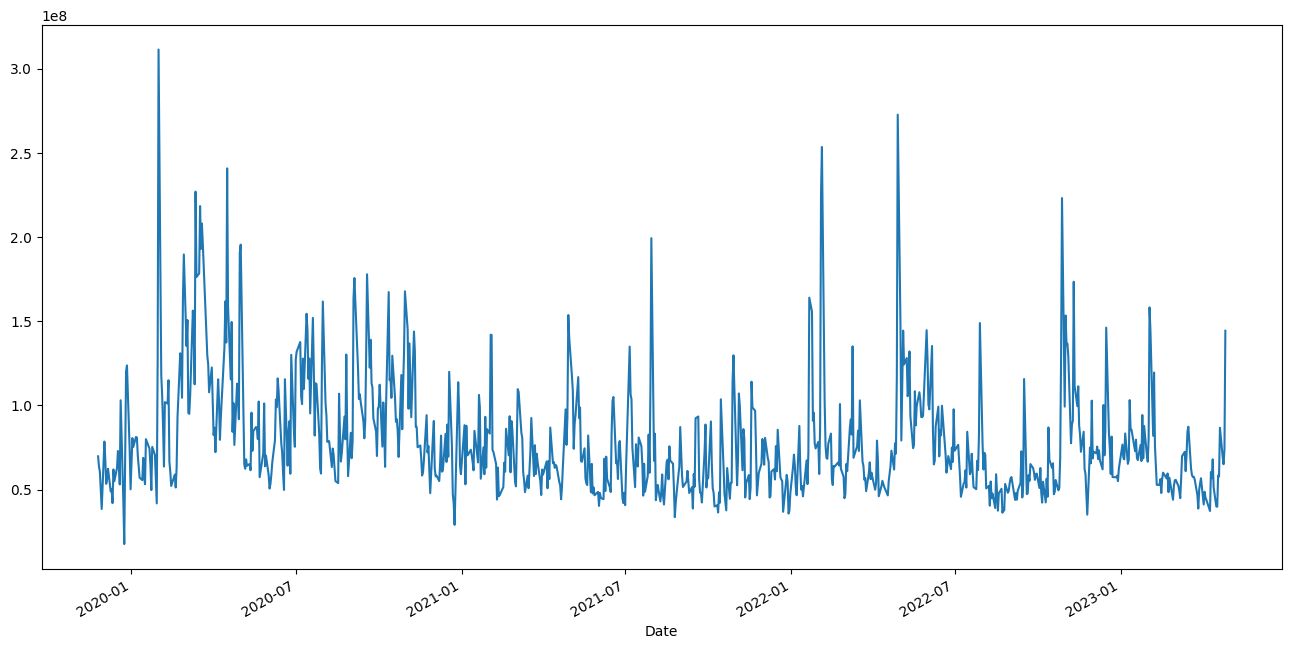

In [ ]:
#Visualize the change in a stock’s volume being traded, over time?
AMZN['Volume'].plot(figsize=(16,8))

In [ ]:
#What was the moving average of various stocks?
AMZN['Move_avg'] = AMZN['Close'].rolling(30).mean()
AMZN.dropna(inplace=True)
AMZN


,Open,High,Low,Close,Adj Close,Volume,Move_avg
Date,,,,,,,
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,90.276683
2020-01-09,95.494499,95.890999,94.790001,95.052498,95.052498,63346000,90.488700
2020-01-10,95.268501,95.347000,94.000000,94.157997,94.157997,57074000,90.632400
2020-01-13,94.565498,94.900002,94.040001,94.565002,94.565002,55616000,90.753717
2020-01-14,94.293999,94.355499,92.927498,93.472000,93.472000,68818000,90.868117
...,...,...,...,...,...,...,...
2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86689700,100.079000
2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69575600,100.594999
2023-04-25,104.910004,105.449997,102.449997,102.570000,102.570000,65026800,100.932999


<Axes: xlabel='Date'>

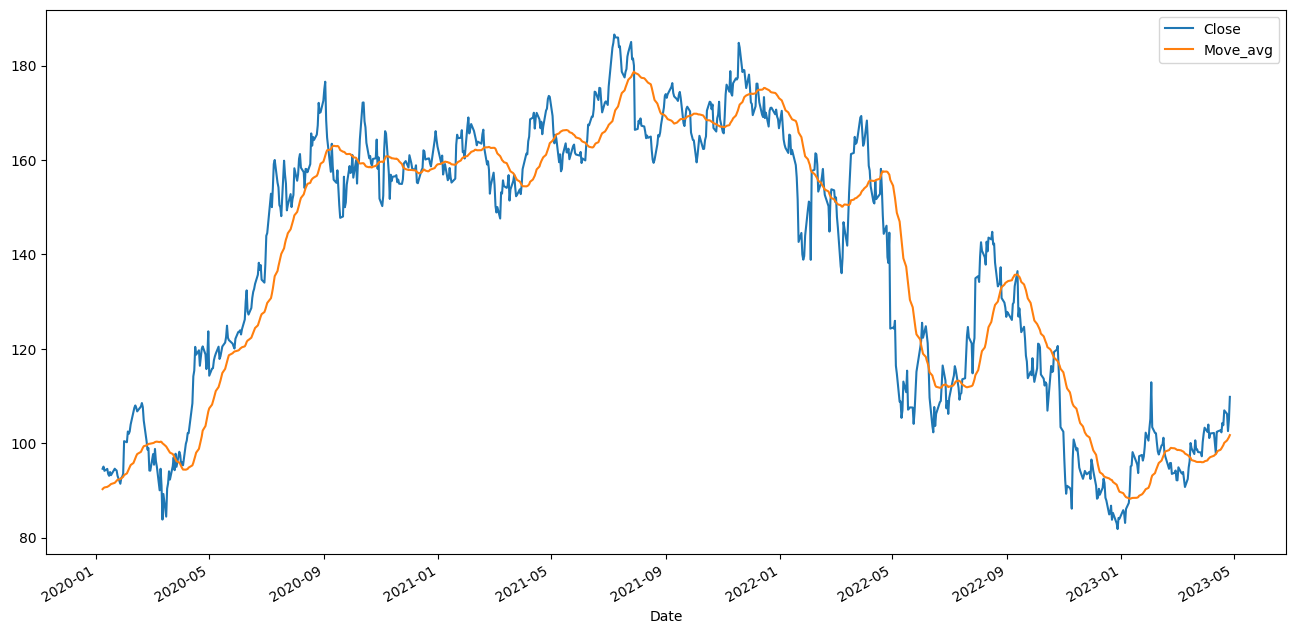

In [ ]:
AMZN[["Close","Move_avg"]].plot(figsize=(16,8))


In [ ]:
#What was the daily return average of a stock?
daily_return_avg=AMZN['Close'].pct_change().mean()
daily_return_avg


0.00048242698402957526

In [ ]:
#Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

AMZN['daily_perc'] = AMZN['Close'].pct_change()*100
AMZN.dropna(inplace=True)

AMZN


,Open,High,Low,Close,Adj Close,Volume,Move_avg,daily_perc
Date,,,,,,,,
2020-01-09,95.494499,95.890999,94.790001,95.052498,95.052498,63346000,90.488700,0.479917
2020-01-10,95.268501,95.347000,94.000000,94.157997,94.157997,57074000,90.632400,-0.941060
2020-01-13,94.565498,94.900002,94.040001,94.565002,94.565002,55616000,90.753717,0.432258
2020-01-14,94.293999,94.355499,92.927498,93.472000,93.472000,68818000,90.868117,-1.155821
2020-01-15,93.612503,93.943001,92.754501,93.100998,93.100998,57932000,91.002150,-0.396913
...,...,...,...,...,...,...,...,...
2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86689700,100.079000,3.034391
2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69575600,100.594999,-0.701197
2023-04-25,104.910004,105.449997,102.449997,102.570000,102.570000,65026800,100.932999,-3.427172


In [ ]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return "Slight or No change"
  elif x > -1 and x <= -0.5:
    return "Slight Negative"
  elif x > 0.5 and x <= 1:
    return "Slight Positive"
  elif x > 1 and x <= 3:
    return "Positive"
  elif x > -3 and x <= -1:
    return "Negative"
  elif x > 3 and x <= 7:
    return "Among top gainers"
  elif x > -7 and x <= -3:
    return "Among top losers"
  elif x > 7:
    return "Bull run"
  elif x <= -7:
    return "Bear drop"


In [ ]:
AMZN['Trend'] = AMZN['daily_perc'].apply(lambda x : trend(x))
AMZN

,Open,High,Low,Close,Adj Close,Volume,Move_avg,daily_perc,Trend
Date,,,,,,,,,
2020-01-09,95.494499,95.890999,94.790001,95.052498,95.052498,63346000,90.488700,0.479917,Slight or No change
2020-01-10,95.268501,95.347000,94.000000,94.157997,94.157997,57074000,90.632400,-0.941060,Slight Negative
2020-01-13,94.565498,94.900002,94.040001,94.565002,94.565002,55616000,90.753717,0.432258,Slight or No change
2020-01-14,94.293999,94.355499,92.927498,93.472000,93.472000,68818000,90.868117,-1.155821,Negative
2020-01-15,93.612503,93.943001,92.754501,93.100998,93.100998,57932000,91.002150,-0.396913,Slight or No change
...,...,...,...,...,...,...,...,...,...
2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86689700,100.079000,3.034391,Among top gainers
2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69575600,100.594999,-0.701197,Slight Negative
2023-04-25,104.910004,105.449997,102.449997,102.570000,102.570000,65026800,100.932999,-3.427172,Among top losers


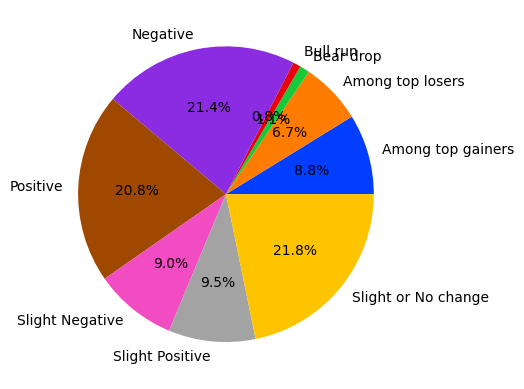

In [ ]:
#Visualize trend frequency through a Pie Chart
pie_data = AMZN.groupby('Trend')
pie_label = sorted([i for i in AMZN.loc[:, 'Trend'].unique()])
color=sns.color_palette('bright')
plt.pie(pie_data['daily_perc'].count(), labels = pie_label, colors=color,autopct = '%1.1f%%')
plt.show()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861 entries, 2019-11-25 to 2023-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       861 non-null    float64
 1   High       861 non-null    float64
 2   Low        861 non-null    float64
 3   Close      861 non-null    float64
 4   Adj Close  861 non-null    float64
 5   Volume     861 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.1 KB


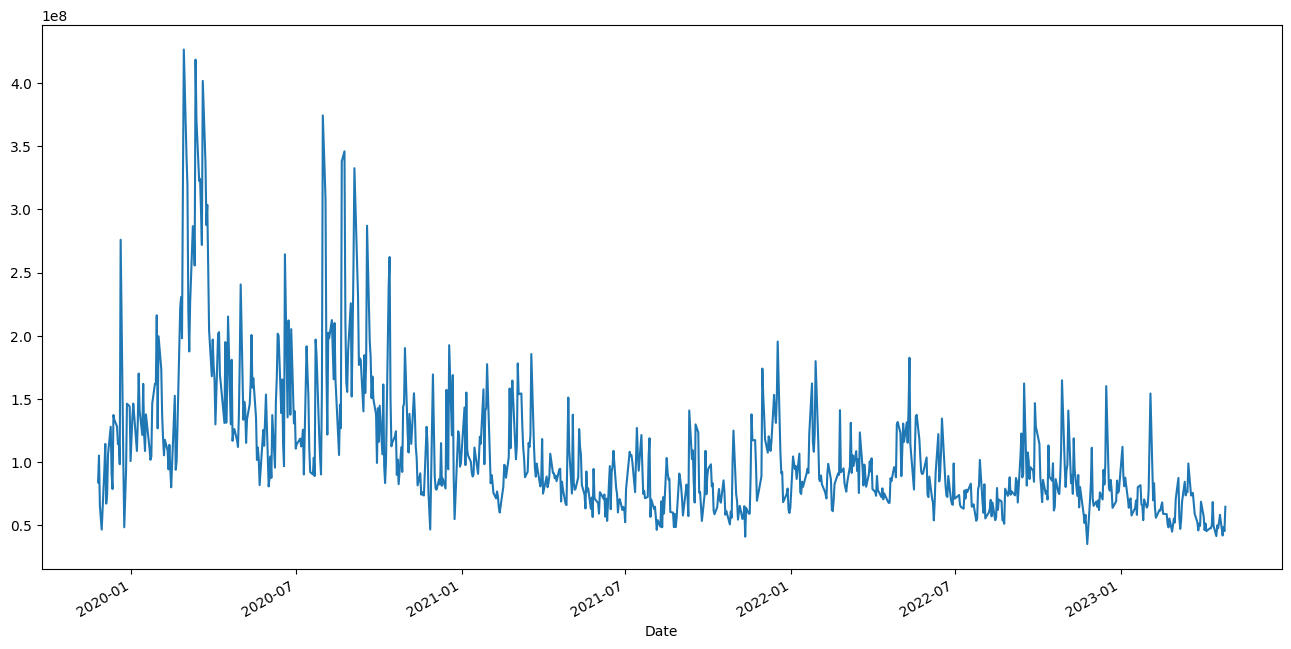

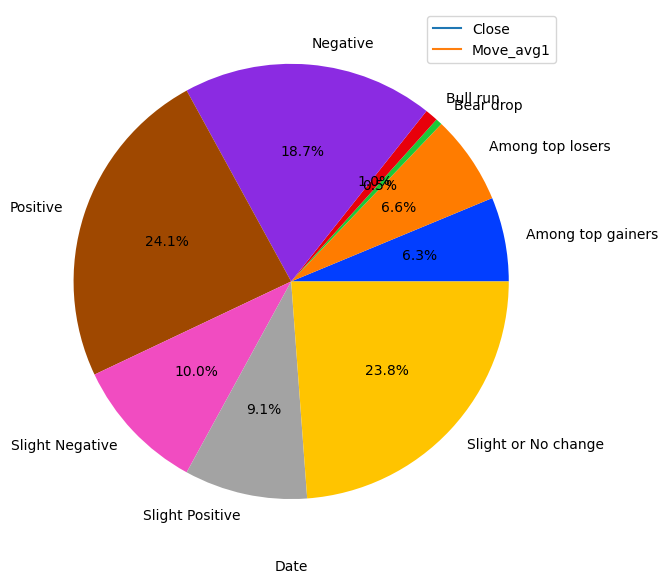

In [ ]:
# APPLE stock predection :

# we will first analyze amazon stocks and move further with other stocks
AAPL.head(10)

#data cleaning. Checking if any null values
AAPL.isna().any()
AAPL.info()

#What was the change in stock price over time?

Change_stock1 = AAPL['Close'].diff().abs().sort_values(ascending=False)
Change_stock1.dropna(inplace=True)
Change_stock1

#Visualize the change in a stock’s volume being traded, over time?
AAPL['Volume'].plot(figsize=(16,8))

#What was the moving average of various stocks?
AAPL['Move_avg1'] = AAPL['Close'].rolling(30).mean()
AAPL.dropna(inplace=True)
AAPL

AAPL[["Close","Move_avg1"]].plot(figsize=(16,8))

#What was the daily return average of a stock?
daily_return_avg1=AAPL['Close'].pct_change().mean()
daily_return_avg1

#Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

AAPL['daily_perc1'] = AAPL['Close'].pct_change()*100
AAPL.dropna(inplace=True)

AAPL


AAPL['Trend1'] = AAPL['daily_perc1'].apply(lambda x : trend(x))
AAPL

#Visualize trend frequency through a Pie Chart
pie_data1 = AAPL.groupby('Trend1')
pie_label1 = sorted([i for i in AAPL.loc[:, 'Trend1'].unique()])
color=sns.color_palette('bright')
plt.pie(pie_data1['daily_perc1'].count(), labels = pie_label1, colors=color,autopct = '%1.1f%%')
plt.show()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861 entries, 2019-11-25 to 2023-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       861 non-null    float64
 1   High       861 non-null    float64
 2   Low        861 non-null    float64
 3   Close      861 non-null    float64
 4   Adj Close  861 non-null    float64
 5   Volume     861 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.1 KB


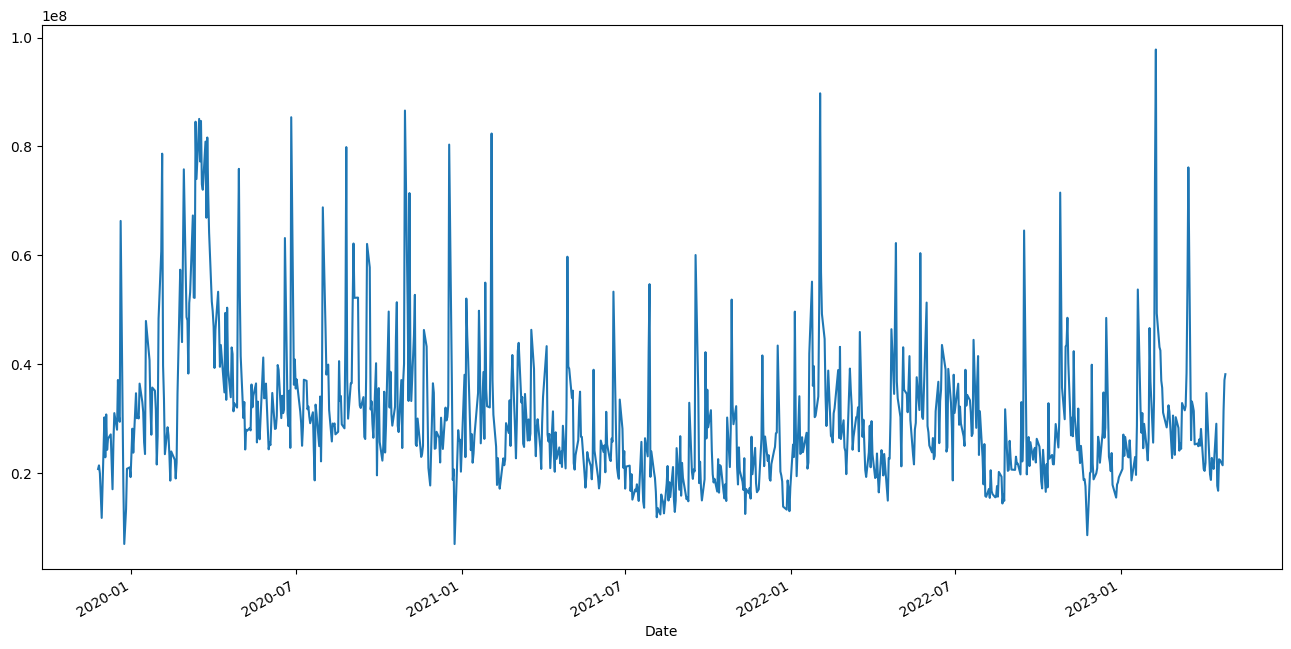

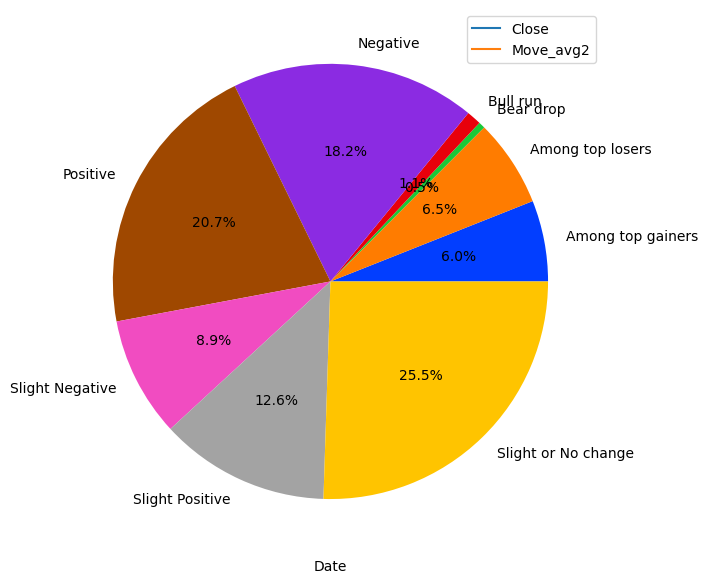

In [ ]:
#Google stock prediction :

# we will first analyze amazon stocks and move further with other stocks
GOOG.head(10)

#data cleaning. Checking if any null values
GOOG.isna().any()
GOOG.info()

#What was the change in stock price over time?

Change_stock2 = GOOG['Close'].diff().abs().sort_values(ascending=False)
Change_stock2.dropna(inplace=True)
Change_stock2

#Visualize the change in a stock’s volume being traded, over time?
GOOG['Volume'].plot(figsize=(16,8))

#What was the moving average of various stocks?
GOOG['Move_avg2'] = GOOG['Close'].rolling(30).mean()
GOOG.dropna(inplace=True)
GOOG

GOOG[["Close","Move_avg2"]].plot(figsize=(16,8))

#What was the daily return average of a stock?
daily_return_avg2=GOOG['Close'].pct_change().mean()
daily_return_avg2

#Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

GOOG['daily_perc2'] = GOOG['Close'].pct_change()*100
GOOG.dropna(inplace=True)

GOOG


GOOG['Trend2'] = GOOG['daily_perc2'].apply(lambda x : trend(x))
GOOG

#Visualize trend frequency through a Pie Chart
pie_data2 = GOOG.groupby('Trend2')
pie_label2 = sorted([i for i in GOOG.loc[:, 'Trend2'].unique()])
color=sns.color_palette('bright')
plt.pie(pie_data2['daily_perc2'].count(), labels = pie_label2, colors=color,autopct = '%1.1f%%')
plt.show()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861 entries, 2019-11-25 to 2023-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       861 non-null    float64
 1   High       861 non-null    float64
 2   Low        861 non-null    float64
 3   Close      861 non-null    float64
 4   Adj Close  861 non-null    float64
 5   Volume     861 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.1 KB


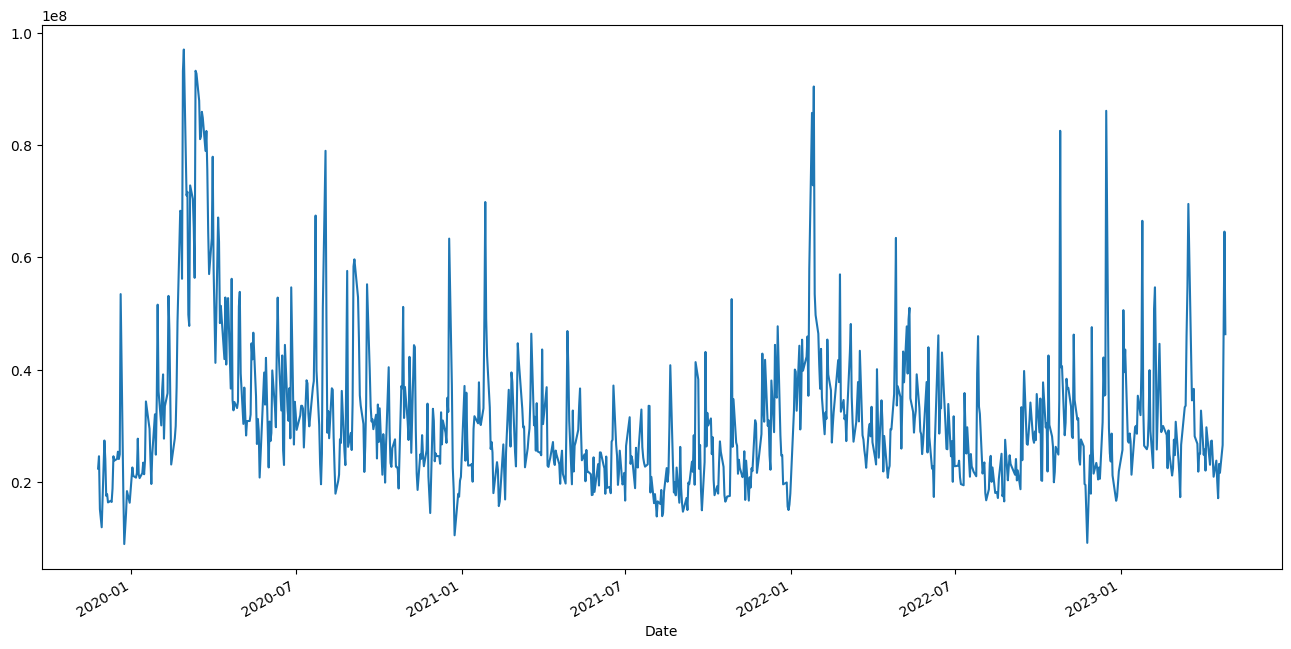

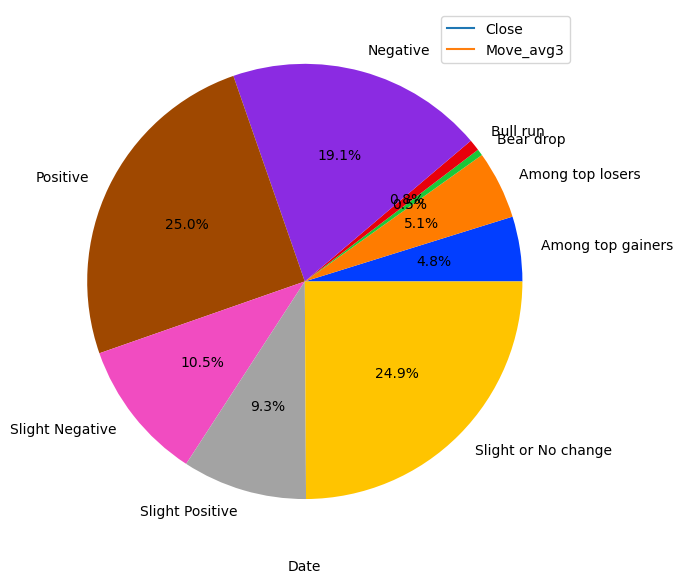

In [ ]:
# we will first analyze amazon stocks and move further with other stocks
MSFT.head(10)

#data cleaning. Checking if any null values
MSFT.isna().any()
MSFT.info()

#What was the change in stock price over time?

Change_stock3 = MSFT['Close'].diff().abs().sort_values(ascending=False)
Change_stock3.dropna(inplace=True)
Change_stock3

#Visualize the change in a stock’s volume being traded, over time?
MSFT['Volume'].plot(figsize=(16,8))

#What was the moving average of various stocks?
MSFT['Move_avg3'] = MSFT['Close'].rolling(30).mean()
MSFT.dropna(inplace=True)
MSFT

MSFT[["Close","Move_avg3"]].plot(figsize=(16,8))

#What was the daily return average of a stock?
daily_return_avg3=MSFT['Close'].pct_change().mean()
daily_return_avg3

#Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

MSFT['daily_perc3'] = MSFT['Close'].pct_change()*100
MSFT.dropna(inplace=True)

MSFT


MSFT['Trend3'] = MSFT['daily_perc3'].apply(lambda x : trend(x))
MSFT

#Visualize trend frequency through a Pie Chart
pie_data3 = MSFT.groupby('Trend3')
pie_label3 = sorted([i for i in MSFT.loc[:, 'Trend3'].unique()])
color=sns.color_palette('bright')
plt.pie(pie_data3['daily_perc3'].count(), labels = pie_label3, colors=color,autopct = '%1.1f%%')
plt.show()



In [ ]:
# COMBINED ANALYSIS

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

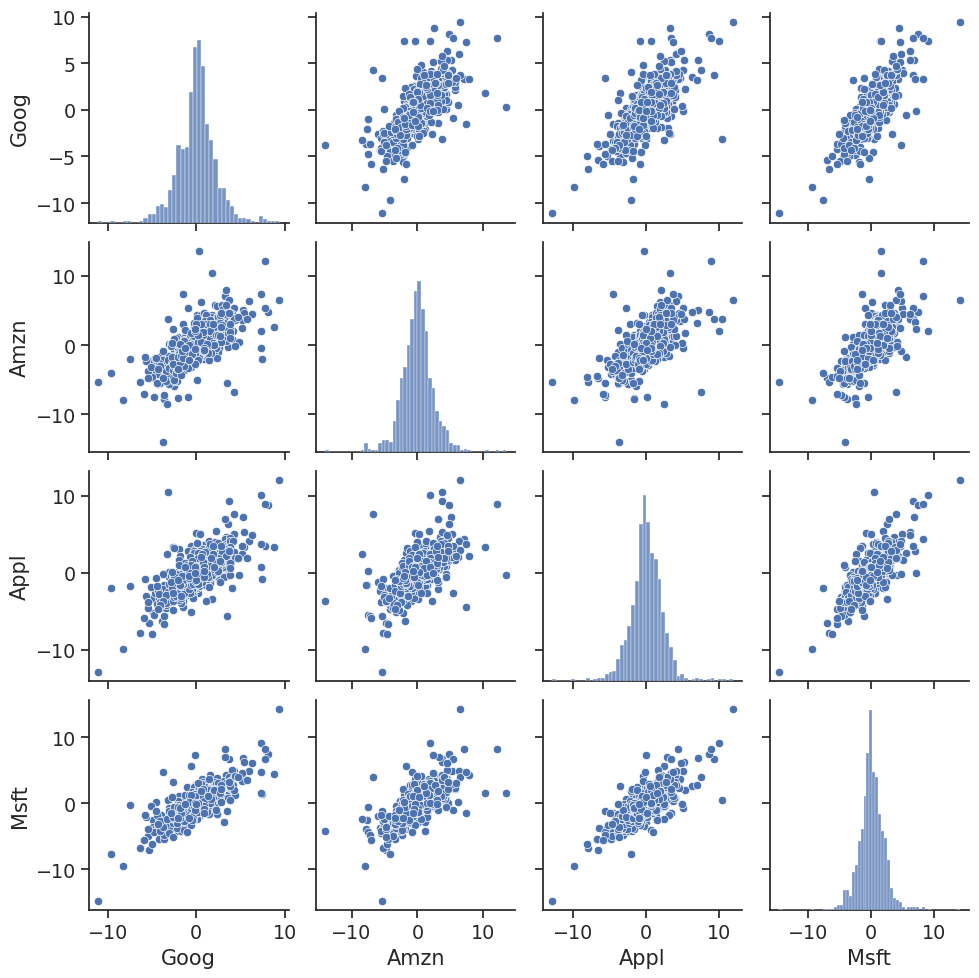

In [ ]:
GOOG_stock = GOOG['Close']
AMZN_stock = AMZN['Close']
AAPL_stock = AAPL['Close']
MSFT_stock = MSFT['Close']
combined = pd.concat([GOOG_stock,AMZN_stock,AAPL_stock,MSFT_stock], axis=1)

#renaming the columns
i = 0
lst = ["Goog","Amzn","Appl","Msft"]
for x in lst:
  combined[x]= combined.iloc[:,i]
  i = i+1

#removing the unwanted columns and rows
combined.drop('Close', axis=1, inplace=True)
combined.dropna(axis=0, inplace=True)

combined_pct = combined.pct_change()*100
combined_pct.dropna(axis=0, inplace=True)

import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(combined_pct)